# Pymaceuticals Inc.
---

### Analysis

1. The first observation that I would like to point out is that when calculating the outliers for the treatments "Capomulin", "Ramicane", "Infubinol", and "Ceftamin" the only treatment that had outliers was Infubinol.
2. The second observation that I can point out is that the line of regression is indication that there is a positive correlation between mouse weight and average tumor volume.
3. The final observation that I can make is that there was almost a 50/50 split in the sex of the rats used in these trials, however there were slightly more male rats at the end of the day (958 as opposed to the 922 female rats )
 

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Plotting-Challenge/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Plotting-Challenge/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame\

combined_data = pd.merge(mouse_metadata,study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [68]:
# Checking the number of mice.

all_mice = combined_data["Mouse ID"].unique()
mouse_total = len(all_mice)
mouse_total


249

In [69]:
# Our data should be uniquely identified by Mouse ID and Timepoint

no_repeats = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

no_repeats


array(['g989'], dtype=object)

In [70]:
# Optional: Get all the data for the duplicate mouse ID.

bye_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
bye_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [71]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data["Mouse ID"].isin(no_repeats)==False]
clean_data.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice in the clean DataFrame.

total_new_mice = clean_data["Mouse ID"].nunique()

total_new_mice


248

## Summary Statistics

In [73]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

long_groupby = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"])

mean = long_groupby.mean()

median = long_groupby.median()

variance = long_groupby.var()

stdev = long_groupby.std()

sem = long_groupby.sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": variance,
                              "Tumor Volume Standard Deviation": stdev,
                              "Tumor Volume SEM": sem})

summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [74]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

easy_summary = clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])

easy_summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

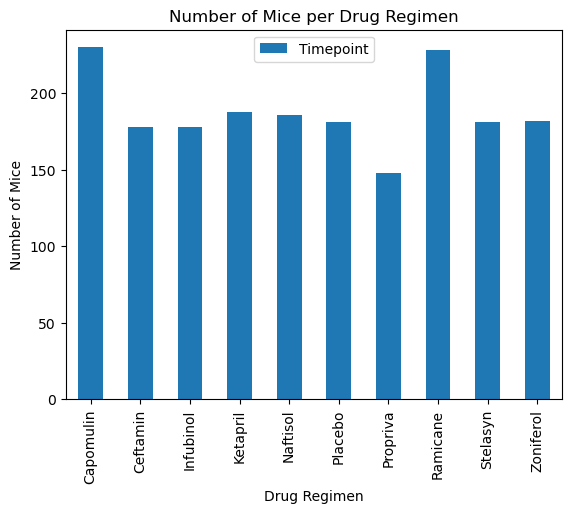

In [75]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mousenumber = clean_data.groupby(["Drug Regimen"])["Timepoint"].count()


pandas_bar = mousenumber.plot.bar()

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.legend(loc="best")
plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ceftamin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Ketapril'),
  Text(4, 0, 'Naftisol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Propriva'),
  Text(7, 0, 'Ramicane'),
  Text(8, 0, 'Stelasyn'),
  Text(9, 0, 'Zoniferol')])

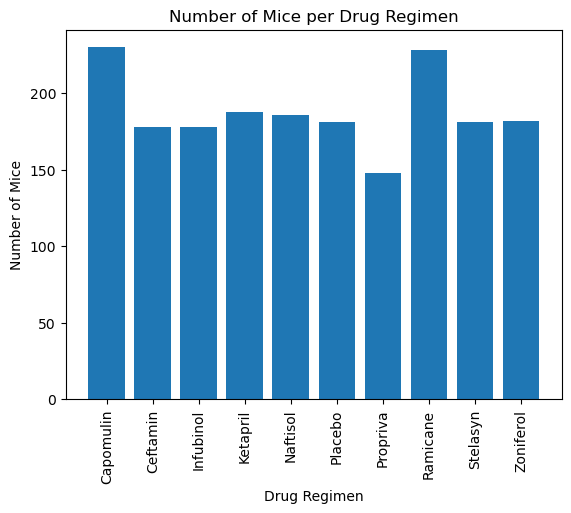

In [76]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(mousenumber.index, mousenumber.values)

plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")



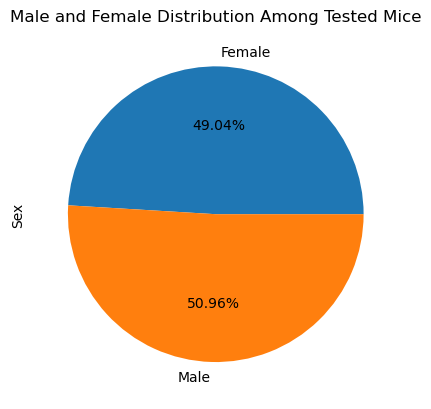

Sex
Female    922
Male      958
Name: Sex, dtype: int64

In [77]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

sex = clean_data.groupby(["Sex"])["Sex"].count()

# Make the pie chart

sex.plot.pie(autopct= "%.2f%%")
plt.title("Male and Female Distribution Among Tested Mice")
plt.show()

# Get the unique mice with their gender
sex.head()

Sex
Female    922
Male      958
Name: Sex, dtype: int64

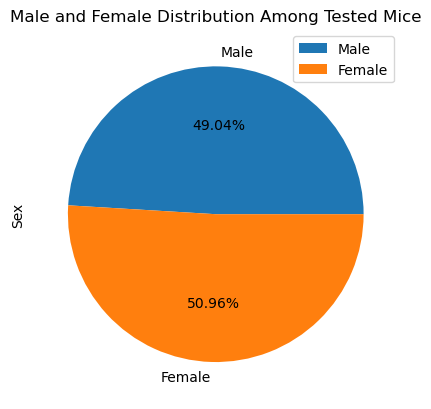

In [78]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

plt.pie(sex, labels = ("Male", "Female"), autopct="%.2f%%")
plt.title("Male and Female Distribution Among Tested Mice")
plt.ylabel("Sex")
plt.legend(loc="best")
plt.show

# Get the unique mice with their gender

sex.head()

# Make the pie chart


## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].max()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

last_timepoint_df = pd.DataFrame(last_timepoint)

last_timepoint_df = pd.merge(last_timepoint_df, clean_data, on=("Drug Regimen", "Mouse ID", "Timepoint"), how="left")

last_timepoint_df




,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,Male,12,25,70.827796,2
244,Zoniferol,s337,45,Male,14,27,62.109651,4
245,Zoniferol,w140,5,Female,19,30,47.717952,0
246,Zoniferol,w575,45,Female,16,28,68.401286,3


In [80]:
# Put treatments into a list for for loop (and later for plot labels)

list_of_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

Tumor = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in list_of_treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes

    volume = last_timepoint_df.loc[last_timepoint_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    Tumor.append(volume)

    # add subset

    quartiles = volume.quantile([0.25, 0.5, 0.75])

    iqr = (quartiles[0.75] - quartiles[0.25])

    upper_bounds = quartiles[0.75] + (1.5*iqr)
    lower_bounds = quartiles[0.25] - (1.5*iqr)

    # Determine outliers using upper and lower bounds

    outlier = volume.loc[(volume > upper_bounds) | (volume < lower_bounds)]

    print(treatment + ":")
    print("Upper Bounds: " + str(upper_bounds))
    print("Lower Bounds: "+ str(lower_bounds))
    print("Interquartile range (IQR): " + str(iqr))
    print("Outliers: " + str(outlier))



Capomulin:
Upper Bounds: 51.83201549
Lower Bounds: 20.70456164999999
Interquartile range (IQR): 7.781863460000004
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane:
Upper Bounds: 54.30681135
Lower Bounds: 17.912664470000003
Interquartile range (IQR): 9.098536719999998
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol:
Upper Bounds: 82.74144559000001
Lower Bounds: 36.83290494999999
Interquartile range (IQR): 11.477135160000003
Outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin:
Upper Bounds: 87.66645829999999
Lower Bounds: 25.355449580000002
Interquartile range (IQR): 15.577752179999997
Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\kiera\AppData\Local\Temp\ipykernel_29556\3676477191.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(Tumor, labels=Treatment)


{'whiskers': [<matplotlib.lines.Line2D at 0x2bf433e0a10>,
 'caps': [<matplotlib.lines.Line2D at 0x2bf4239b2f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bf433e0800>,
 'medians': [<matplotlib.lines.Line2D at 0x2bf433e1430>,
 'fliers': [<matplotlib.lines.Line2D at 0x2bf433e16d0>,
 'means': []}

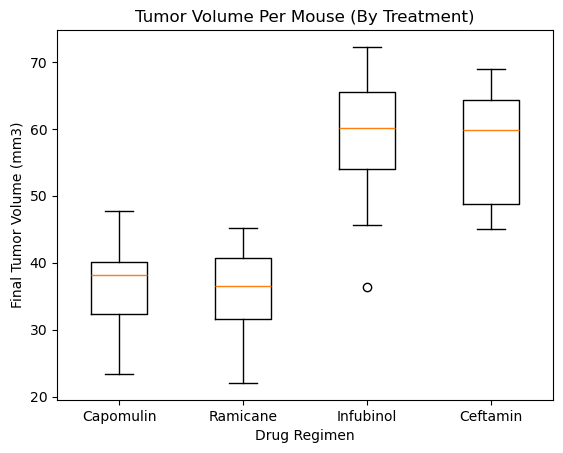

In [81]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

Treatment = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

plt.title("Tumor Volume Per Mouse (By Treatment)")
plt.ylabel("Final Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")
plt.boxplot(Tumor, labels=Treatment)



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

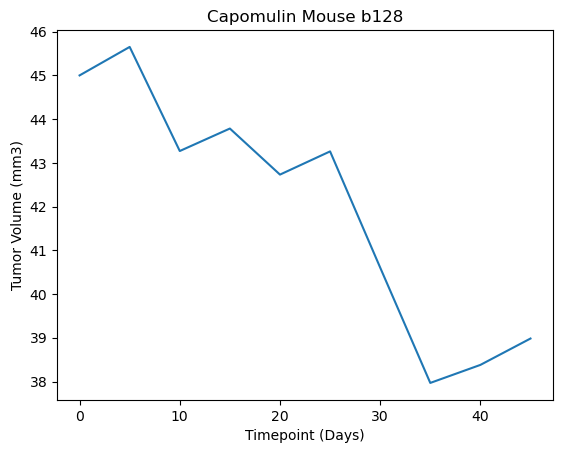

In [82]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_mice = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

Certain_Capomulin_Mouse = Capomulin_mice.loc[Capomulin_mice["Mouse ID"] == "b128"]

xlabel = Certain_Capomulin_Mouse["Timepoint"]
ylabel = Certain_Capomulin_Mouse["Tumor Volume (mm3)"]

plt.title("Capomulin Mouse b128")
plt.plot(xlabel, ylabel)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")







<function matplotlib.pyplot.show(close=None, block=None)>

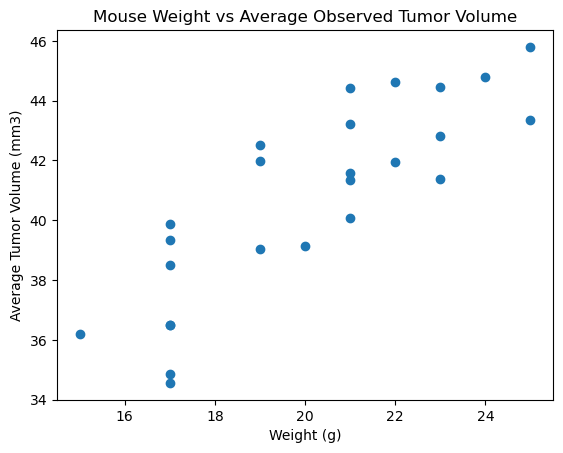

In [83]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_mouse = Capomulin_mice.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()

plt.scatter(capo_mouse["Weight (g)"], capo_mouse["Tumor Volume (mm3)"])

plt.title("Mouse Weight vs Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show



## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

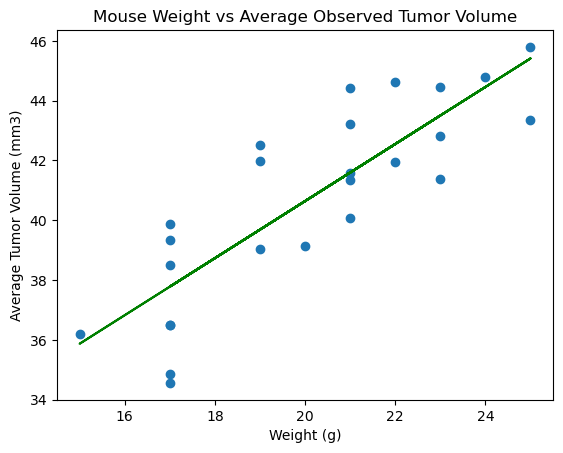

In [84]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

xvalue = capo_mouse["Weight (g)"]
yvalue = capo_mouse["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(xvalue, yvalue)

line = slope*xvalue + intercept
plt.scatter(capo_mouse["Weight (g)"], capo_mouse["Tumor Volume (mm3)"])
plt.plot(capo_mouse["Weight (g)"], line, color="g")
plt.title("Mouse Weight vs Average Observed Tumor Volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
